In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate

import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# Step 1: Data Loading and Understanding

df = pd.read_csv("Ecom.csv")
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [ ]:
df.shape

(5630, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                  220
dtype: int64

In [ ]:
# colums to list
columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
df.select_dtypes(object).columns


Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [ ]:
df.describe(include='O')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
# Show the unique values on each column.
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion    

In [ ]:
df.select_dtypes(include=np.number).columns


Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
df.describe().T.style.bar(subset=['mean'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
CustomerID
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: count, Length: 5630, dtype: int64
________________________________________________________________________________
Churn : [1 0]
Churn
0    4682
1     948
Name: count, dtype: int64
________________________________________________________________________________
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# Counting null values
null_counts = df.isnull().sum()

print(null_counts)


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [ ]:
df['PreferredLoginDevice'].value_counts()


PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [ ]:
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [ ]:
df['PreferredPaymentMode'].value_counts()


PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [ ]:
df.duplicated().sum()


0

In [ ]:
# Remove rows with any null values
df = df.dropna()




In [ ]:
# Counting null values
null_counts = df.isnull().sum()

print(null_counts)

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress        

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode',
       'Gender', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain']
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

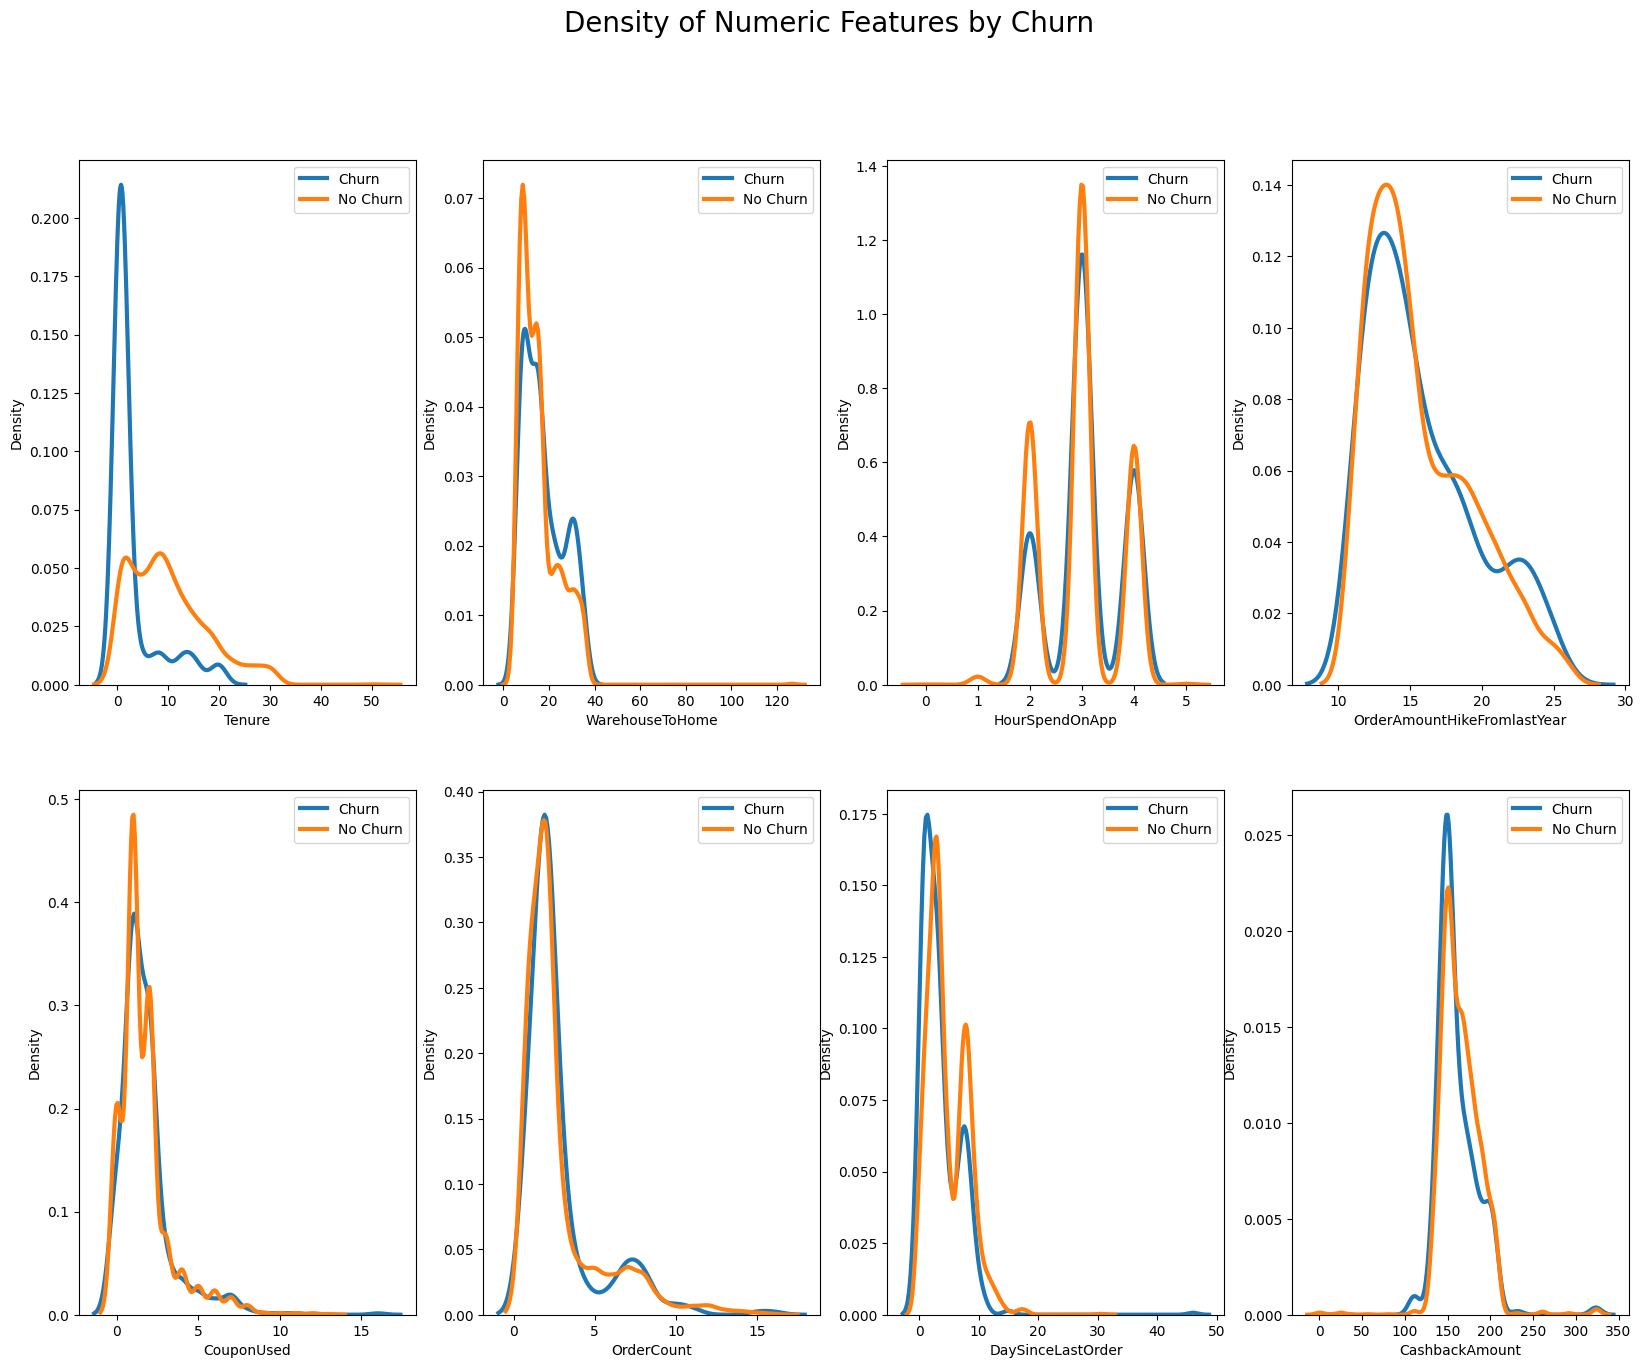

In [ ]:
df_c = df[df['Churn']==1].copy()
df_nc = df[df['Churn']==0].copy()

fig, ax = plt.subplots(2,4,figsize=(20, 15))
fig.suptitle('Density of Numeric Features by Churn', fontsize=20)
ax = ax.flatten()

for idx,c in enumerate(num_cols):
    sns.kdeplot(df_c[c], linewidth= 3,
             label = 'Churn',ax=ax[idx])
    sns.kdeplot(df_nc[c], linewidth= 3,
             label = 'No Churn',ax=ax[idx])

    ax[idx].legend(loc='upper right')

plt.show()

In [ ]:
df2 = df.copy()


**1** Is there a relationship between Gender and Churn? & Which Gender has more Orders?


In [ ]:
#  Gender Churn Relation
df.groupby("Churn")["Gender"].value_counts()

Churn  Gender
0      Male      1868
       Female    1275
1      Male       403
       Female     228
Name: count, dtype: int64

<Axes: xlabel='Gender'>

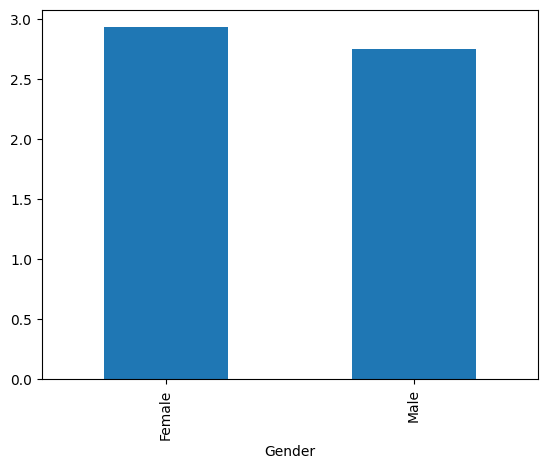

In [ ]:
#Order Count Gender
gender_orders = df.groupby('Gender')['OrderCount'].mean().plot(kind='bar')
gender_orders
# females have more order count avg

In [ ]:
percentageM =600/3384 * 100

percentageM   #the percentage of the leaving males out of the males

17.73049645390071

In [ ]:
percentageF =348/2246 * 100

percentageF  #the percentage of the leaving females out of the females

15.49421193232413

In [ ]:
import pandas as pd
import plotly.express as px
fig = px.pie(df, values='Churn', names='Gender')
fig.update_traces(marker=dict(colors=['pink ', 'baby blue']))

# Update layout
fig.update_layout(
  title='Churn Rate by Gender',
  legend_title='Gender'
)

# Show plot
fig.show()


**2** Which MartialStatus has the highest Churn rate?

In [ ]:
df.groupby("Churn")["MaritalStatus"].value_counts()

Churn  MaritalStatus
0      Married          1763
       Single            918
       Divorced          462
1      Single            327
       Married           219
       Divorced           85
Name: count, dtype: int64

Text(0, 0.5, 'Churn Rate')

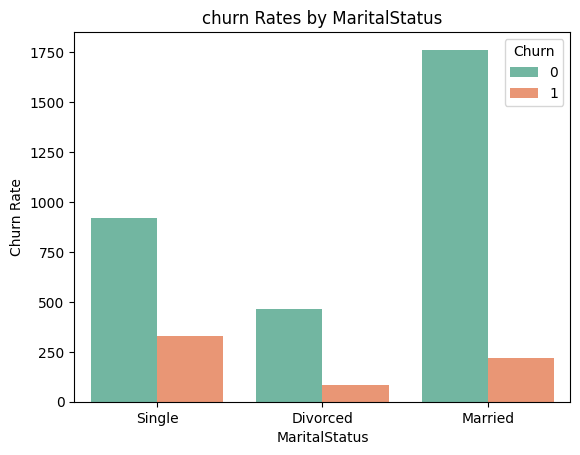

In [ ]:
sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='Set2')
plt.title("churn Rates by MaritalStatus")
plt.ylabel("Churn Rate")

# the married are the highest customer segment in the comapny may be the comapny should consider taking care of the products that suits the single and the married customers as the singles are the most likely to churn from the app

**3** Which CityTier has higher Tenure and OrderCount?

In [ ]:
df_grouped_tenure = df.groupby('CityTier')['Tenure'].agg(['mean', 'max'])
df_grouped_tenure
# citytier 2 has the highest tenure rate but the tenure rate does not seen to be a strong factor
# citytier 3 has the highest order avg but it not to be a strong factor in the customer churning


,mean,max
CityTier,,
1,9.086149,51.0
2,9.439716,31.0
3,8.124111,31.0


**4** Is Customer with High SatisfactionScore have high HourSpendOnApp?

In [ ]:
import matplotlib.pyplot as plt

# plot
fig = px.histogram(df2, x="HourSpendOnApp", y="SatisfactionScore", orientation="h", color="Churn" ,text_auto= True , title="<b>"+'HourSpendOnApp Vs SatisfactionScore' , color_discrete_sequence = ['#BA1F43','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='HourSpendOnApp',
yaxis_title='SatisfactionScore',
)
fig.show()

# as we see people with less satisfaction score spend less time on the app than the people of satisfaction score 5 but also i do not think there is any realation between the satisfaction score and people's spent time on the app

**5** Which CityTier has the most HourSpendOnApp?

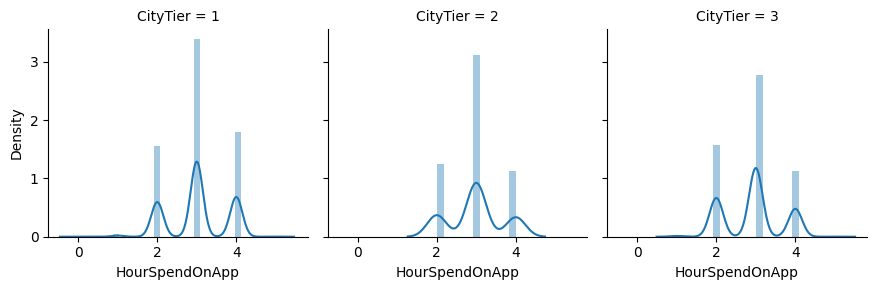

In [ ]:
g = sns.FacetGrid(df, col='CityTier')
g.map(sns.distplot, 'HourSpendOnApp')

city tier 1 has the most spended hours on the app



**6** -What is the relation between Complain and DaySinceLastOrder?

In [ ]:
import plotly.express as px

fig = px.scatter(df, x='DaySinceLastOrder', y='Complain', facet_col='Churn')
fig.update_layout(hovermode='closest')
fig.show()

there is a weak negative relation between complainig and the number of dayes since last order



**7**-Is there a relationship between PreferredLoginDevice and churn?

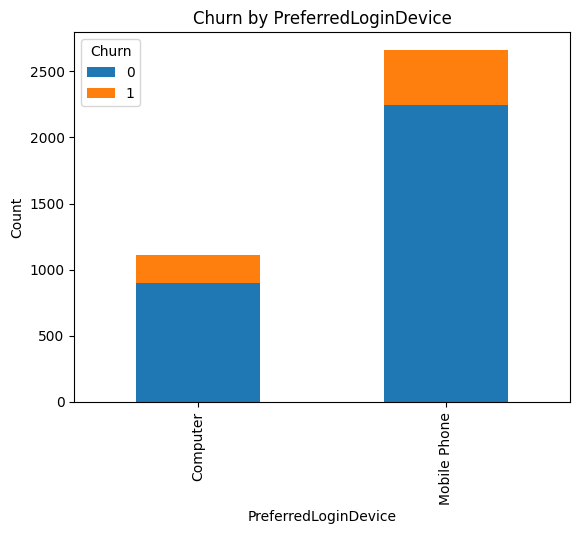

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined
# Group the data by 'PreferredLoginDevice' and 'Churn', and calculate the count
grouped_data = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack()

# Plot the data
grouped_data.plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Show the plot
plt.show()


mobile phone users are likely to churn may be this indicates a problem on the app user experience on the app mobile version



**8**-What is distancebetween warehosue to customer house in different city tier ?


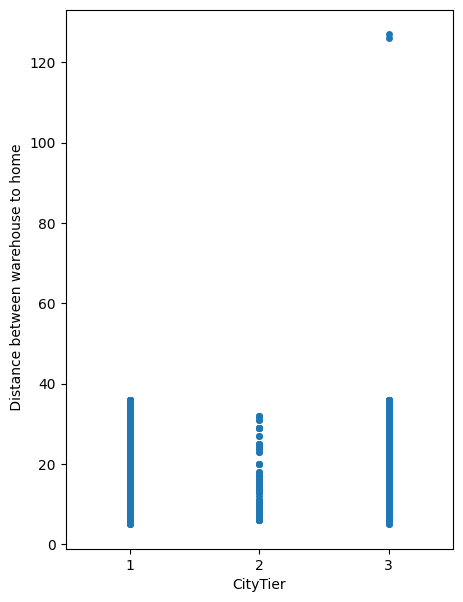

In [ ]:
df3 = df.copy()

df3['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df3, jitter = False)
plt.ylabel(' Distance between warehouse to home');

Inference: As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also.





**9**-Does different citytiers has different prefered products?


In [ ]:
import plotly.express as px
earth_palette = ["#A67C52", "#8F704D", "#B09B71", "#7E786E"]


fig=px.histogram(df,x="PreferedOrderCat",facet_col="CityTier",color="CityTier",color_discrete_sequence=earth_palette,text_auto= True , title="<b>"+'CityTier Vs PreferedOrderCat')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

laptop & accesories and mobile phones are the prefered category for all the city tiers



**11**- What is the preferred payment mode for different CityTiers?

In [ ]:
df2['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          1538
Credit Card         1159
E wallet             443
Cash on Delivery     349
UPI                  285
Name: count, dtype: int64

In [ ]:
df2.groupby('CityTier')[['PreferredPaymentMode']].value_counts()


CityTier  PreferredPaymentMode
1         Debit Card              1086
          Credit Card              870
          Cash on Delivery         245
          UPI                      167
2         UPI                       68
          Debit Card                37
          Credit Card               26
          Cash on Delivery          10
3         E wallet                 443
          Debit Card               415
          Credit Card              263
          Cash on Delivery          94
          UPI                       50
Name: count, dtype: int64

In [ ]:
import plotly.express as px

fig=px.histogram(df2,x="PreferredPaymentMode",facet_col="CityTier",color="CityTier",text_auto= True , title="<b>"+'CityTier Vs PaymentMethod')

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferredPaymentMode',
yaxis_title='count',
)
fig.show()

preferred payment method for CityTier '1' ==> DebitCard
preferred payment method for CityTier '2' ==> UPI
preferred payment method for CityTier '3' ==> E wallet

**12**-Which CityTier has the highest OrderCount?¶


In [ ]:
df2.groupby('CityTier')[['OrderCount']].sum()


,OrderCount
CityTier,
1,6577.0
2,320.0
3,3766.0


In [ ]:
fig = px.histogram(df2, x="OrderCount", y="CityTier", orientation="h", color="CityTier" ,text_auto= True , title="<b>"+'CityTier Vs Sum of OrderCount' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Sum of OrderCount',
yaxis_title='count',
)
fig.show()

CityTier '1' has highest order count with 10298 orders

**13**-Does the percentage increase in order amount from last year affect churn rate?

In [ ]:
df2['OrderAmountHikeFromlastYear'].value_counts()


OrderAmountHikeFromlastYear
14.0    541
13.0    522
12.0    514
15.0    408
16.0    236
11.0    235
18.0    229
17.0    216
19.0    214
20.0    168
21.0    140
22.0    115
23.0    104
24.0     58
25.0     51
26.0     23
Name: count, dtype: int64

In [ ]:
df2.groupby('OrderAmountHikeFromlastYear')['Churn'].count()


OrderAmountHikeFromlastYear
11.0    235
12.0    514
13.0    522
14.0    541
15.0    408
16.0    236
17.0    216
18.0    229
19.0    214
20.0    168
21.0    140
22.0    115
23.0    104
24.0     58
25.0     51
26.0     23
Name: Churn, dtype: int64

In [ ]:
comp_ten = df2.groupby(["OrderAmountHikeFromlastYear", "Churn"]).size().reset_index(name="Count")

# Create a bubble chart using Plotly
fig_bubble = px.scatter(comp_ten, x="OrderAmountHikeFromlastYear", y="Count", size="Count", color="Churn", title="<b>"+'OrderAmountHikeFromlastYear VS Churn',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=30)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='OrderAmountHikeFromlastYear',
yaxis_title='count',
)
fig_bubble.show()


Graph Show when the percentage of order last year increase the churn rate decrease so OrderAmountHikeFromlastYear has postive effect on Churn rate and we need to focus when customer has percentage.


**14**-What is the relation between Complain and DaySinceLastOrder for churned customers?


In [ ]:
df_c.groupby('Complain')[['DaySinceLastOrder']].sum()


,DaySinceLastOrder
Complain,
0,1081.0
1,1114.0


In [ ]:
fig = px.histogram(df2, x="DaySinceLastOrder", color="Complain",text_auto= True , title="<b>DaySinceLastOrder Vs Complain" , color_discrete_sequence = ['#BA1F33','#3A506B'],
                   marginal="box") # or violin, rug)

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='DaySinceLastOrder',
yaxis_title='count',
)
fig.show()

customers who didn't made complain has higher DaySinceLastOrder , however it's only one customer so its an outlier if we remove it we will customers with no complain has lower DaySinceLastOrder¶


**15**-What is the order counts for customers with high HourSpendOnApp?¶


In [ ]:
df2['HourSpendOnApp'].agg(['min','max'])


min    0.0
max    5.0
Name: HourSpendOnApp, dtype: float64

In [ ]:
# Define the bin range
bins = [0 , 1 , 3 , 6]
label = ['low' , 'medium' , 'high']
# Create a new column 'HourSpendOnApp_bins' with the binned values
df2['HourSpendOnApp_bins'] = pd.cut(df2['HourSpendOnApp'], bins=bins , labels = label)

In [ ]:
df2.groupby(['HourSpendOnApp_bins','OrderCount'])[['CustomerID']].count()


CustomerID
HourSpendOnApp_bins OrderCount            
low                 1.0                 14
                    2.0                  4
                    3.0                  1
                    4.0                  2
                    5.0                  0
                    6.0                  0
                    7.0                  2
                    8.0                  0
                    9.0                  0
                    10.0                 0
                    11.0                 1
                    12.0                 1
                    13.0                 0
                    14.0                 0
                    15.0                 0
                    16.0                 0
medium              1.0               1043
                    2.0                995
                    3.0                214
                    4.0                107
                    5.0                 87
                    6.0                 76
                    7.0                126
                    8.0                 76
                    9.0                 33
                    10.0                 9
                    11.0                21
                    12.0                17
                    13.0                 9
                    14.0                 9
                    15.0                 7
                    16.0                 4
high                1.0                  0
                    2.0                640
                    3.0                 83
                    4.0                 25
                    5.0                 34
                    6.0                 26
                    7.0                 19
                    8.0                 53
                    9.0                  9
                    10.0                15
                    11.0                 3
                    12.0                 6
                    13.0                 2
                    14.0                 0
                    15.0                 0
                    16.0                 0

In [ ]:
sunbrust_gr = df2.loc[:,['HourSpendOnApp_bins','OrderCount']].dropna()


In [ ]:
fig = px.sunburst(sunbrust_gr,path=['HourSpendOnApp_bins','OrderCount'],title="<b>"+'HourSpendOnApp VS OrderCount',template="plotly" , color_discrete_sequence=["#78b4d5", "#d57f86" ,'#3E885B'])
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.update_traces(textinfo="label+percent parent")

fig.show()

Segment of customers has high spendtime on App has OrderCount 2 with percentage 67%


**16**-Is there a relationship between preferred order category and churn rate?


In [ ]:
df2.groupby(['PreferedOrderCat' , 'Gender'])[['CustomerID']].count()


CustomerID
PreferedOrderCat   Gender            
Fashion            Female         182
                   Male           261
Grocery            Female           2
                   Male             4
Laptop & Accessory Female         821
                   Male          1140
Mobile Phone       Female         490
                   Male           856
Others             Female           8
                   Male            10

In [ ]:
# Group and count by 'PreferedOrderCat' and 'Churn'
ordercat_churnrate = pd.DataFrame(df2.groupby('PreferedOrderCat')['Gender'].value_counts())
ordercat_churnrate = ordercat_churnrate.rename(columns={'Gender': 'Count'})
ordercat_churnrate = ordercat_churnrate.reset_index()


fig = px.histogram(ordercat_churnrate, x='PreferedOrderCat', y = 'count',color='Gender', barmode='group',title="<b>"+'Prefered Category Vs Gender', barnorm = "percent",text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='PreferedOrderCat',
yaxis_title='count',
)
fig.show()


* Top 2 Preferd Category For Males == > [ Others , Mobile Phone ]
* Top 2 Preferd Category For Females == > [ Grocery , Fashion ]

**17**-Do customers who used more coupons have lower churn rates?

In [ ]:
df2.groupby(['CouponUsed' , 'Churn'])[['CustomerID']].count()


CustomerID
CouponUsed Churn            
0.0        0             525
           1              85
1.0        0            1267
           1             256
2.0        0             823
           1             192
3.0        0             195
           1              34
4.0        0             113
           1              21
5.0        0              72
           1              14
6.0        0              61
           1               9
7.0        0              44
           1              13
8.0        0              24
           1               3
9.0        0               5
           1               1
10.0       0               4
           1               1
11.0       0               4
           1               1
12.0       0               4
13.0       0               2
16.0       1               1

In [ ]:
# Group and count by 'Coup' and 'Churn'
coupoun_churnrate = pd.DataFrame(df2.groupby('CouponUsed')['Churn'].value_counts())
coupoun_churnrate = coupoun_churnrate.rename(columns={'Churn': 'Count'})
coupoun_churnrate = coupoun_churnrate.reset_index()


fig = px.bar(coupoun_churnrate, x='CouponUsed', y = 'count',color='Churn', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'CouponUsed Vs Churn Rate',text_auto= True)
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CouponUsed',
yaxis_title='count',
)
fig.show()

Grpah shows Churn become less when more coupons used¶


**18**-Is there a connection between satisfaction score and number of orders in the past month?


In [ ]:
df2.groupby('SatisfactionScore')[['OrderCount']].count()


,OrderCount
SatisfactionScore,
1,798
2,395
3,1131
4,696
5,754


In [ ]:
fig = px.box(df2, y="OrderCount", x='SatisfactionScore', color="SatisfactionScore", title="<b>"+'SatisfactionScore Vs OrderCount',
             boxmode="overlay", points='all')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='SatisfactionScore',
yaxis_title='OrderCount',
)
fig.show()

StatisfactionScore doesn't have affect on OrderCount

**19**-There is relation between CashbackAmount and order counts within churn?

In [ ]:
df_c.groupby(['OrderCount','CashbackAmount'])[['Churn']].count()


Churn
OrderCount CashbackAmount       
1.0        110                 2
           111                 8
           132                 4
           134                 6
           135                 4
...                          ...
10.0       158                 2
11.0       171                 2
           206                 2
15.0       203                 2
16.0       152                 2

[165 rows x 1 columns]

In [ ]:
fig = px.histogram(df2, x='CashbackAmount', y='OrderCount' ,color = 'Churn', title="<b>"+'CashbackAmount Vs OrderCount within churn', color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CashbackAmount',
yaxis_title='OrderCount',
)
fig.show()


Graphs shows there is no relation between cash back amount and ordercount and there is postive relation between cashback amount and churn rate

**20**-Are customers who complained more likely to churn?

In [ ]:
df2.groupby('Complain')[['Churn']].count()


,Churn
Complain,
0,2709
1,1065


In [ ]:
comp_churn = pd.DataFrame(df2.groupby('Complain')['Churn'].value_counts())
comp_churn = comp_churn.rename(columns={'Churn': 'Count'})
comp_churn = comp_churn.reset_index()
print(comp_churn)

comp_churn['Complain'].replace('0' , 'No Complain' , inplace = True)
comp_churn['Complain'].replace('1' , 'Complain' , inplace = True)
comp_churn['Churn'].replace('0' , 'No Churn' , inplace = True)
comp_churn['Churn'].replace('1' , 'Churn' , inplace = True)
print(comp_churn)

# Tree map
fig = px.treemap(comp_churn, path=[px.Constant("all"), 'Complain', 'Churn'], values='count' , color_discrete_sequence=["#2F4B26" , '#FF0000'],title="<b>"+'Complain Vs Churn')
fig.update_traces(textinfo="label+percent parent+value" ,root_color="lightgrey")
fig.update_layout(margin = dict(t=70, l=25, r=25, b=25))

# red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']
# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
)
fig.show()

   Complain  Churn  count
0         0      0   2407
1         0      1    302
2         1      0    736
3         1      1    329
   Complain  Churn  count
0         0      0   2407
1         0      1    302
2         1      0    736
3         1      1    329


No complain doesn't affects on Churn as graph shows customers which made complains 68% doesn't make Churn

**DATA PREPROCESSING**

**Handling Missing Values**


In [ ]:
round((df.isnull().sum()*100 / df.shape[0]),2)


CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

<Axes: >

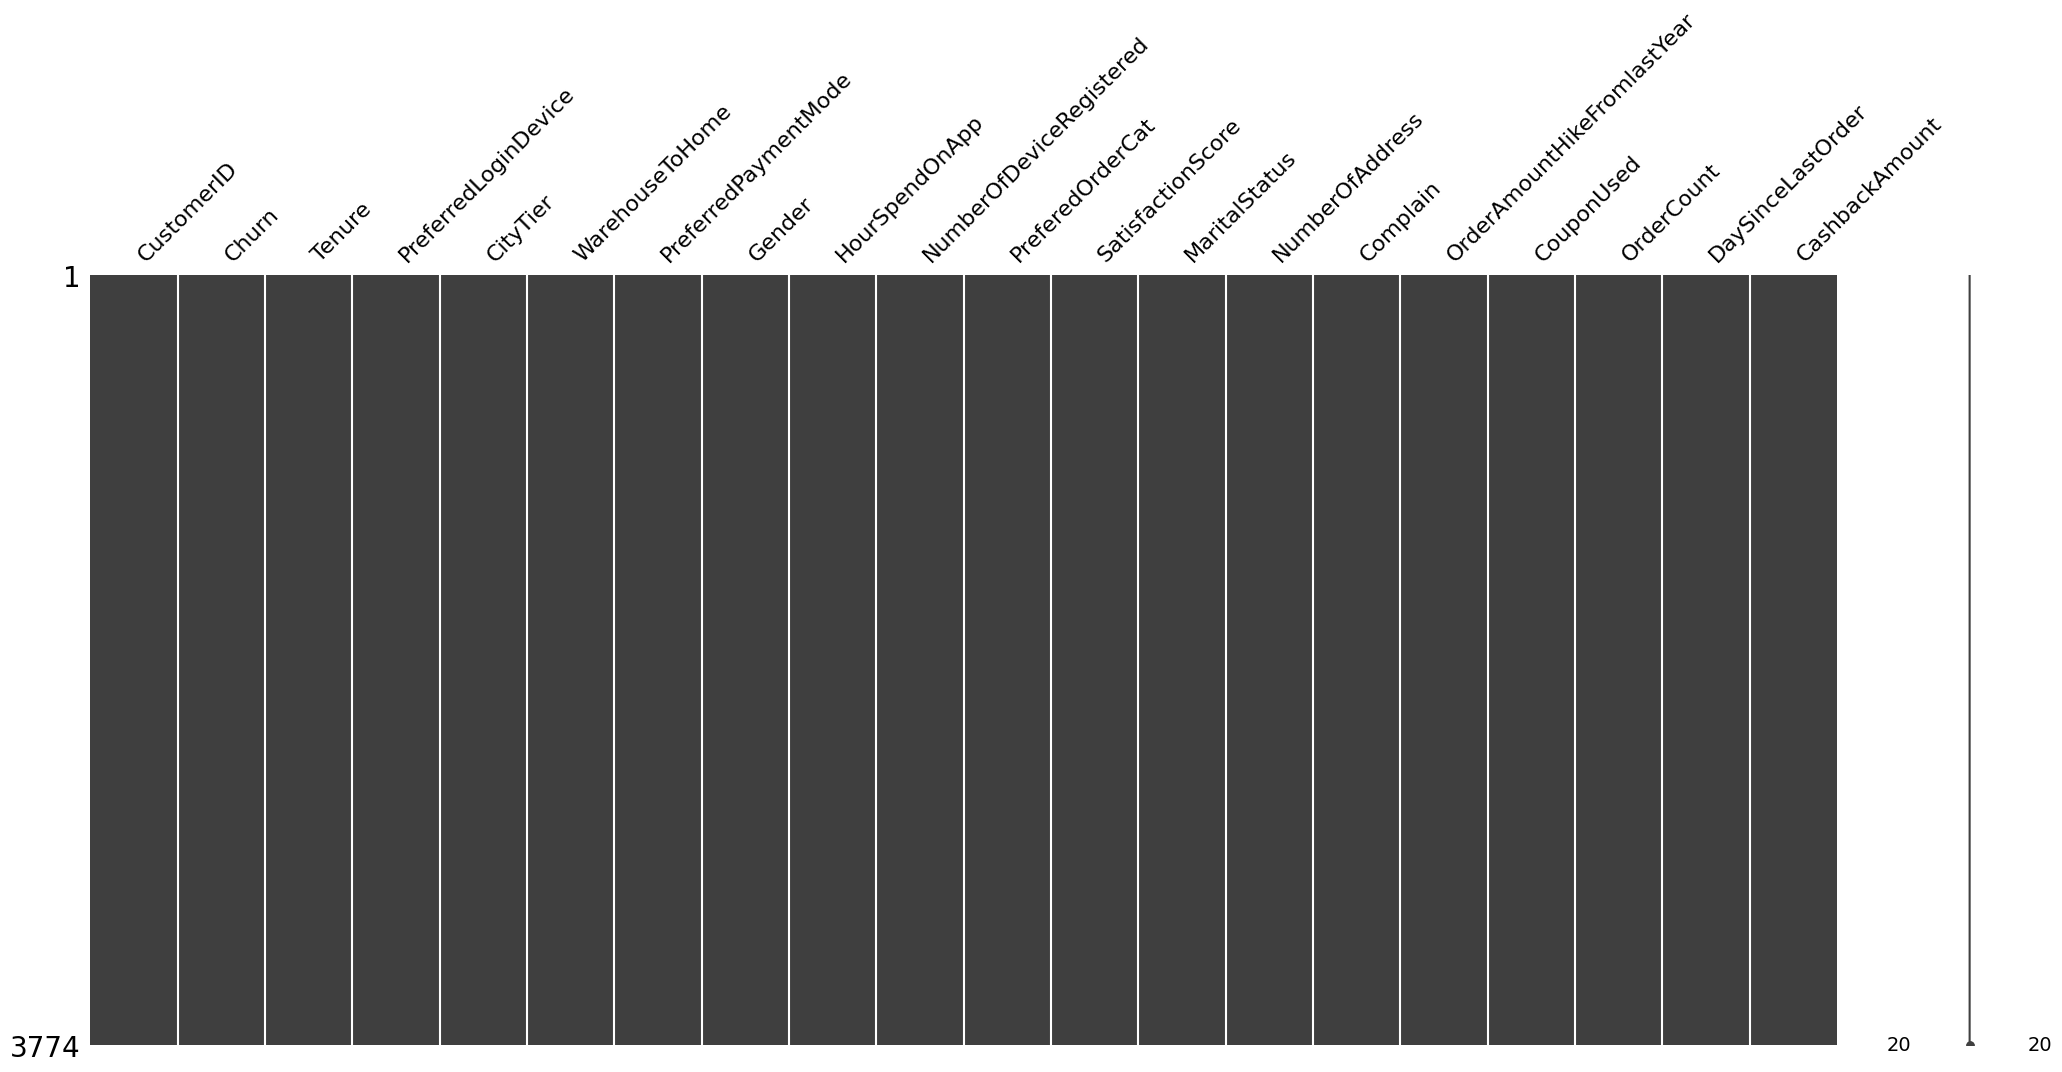

In [ ]:
msno.matrix(df)


<Axes: >

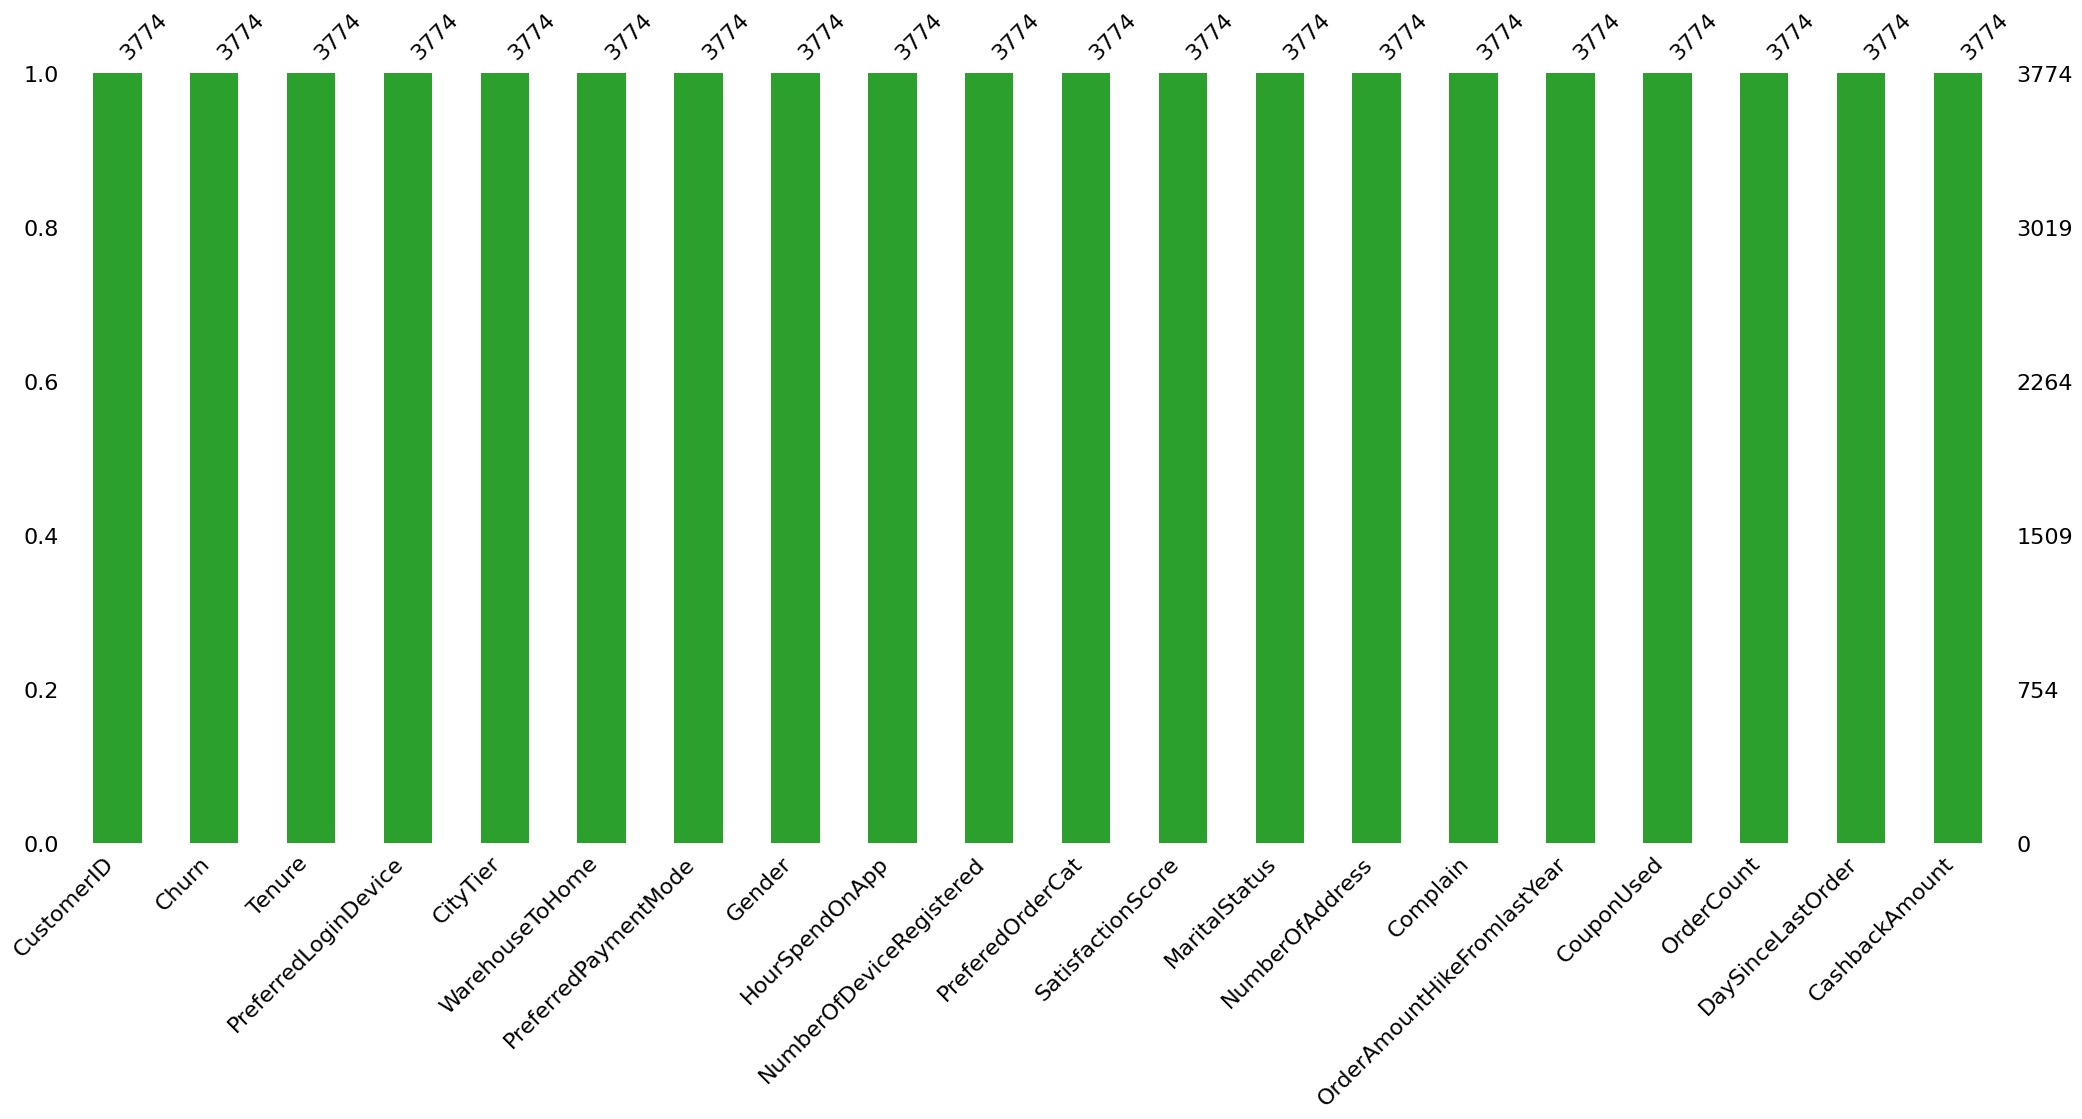

In [ ]:
msno.bar(df , color="tab:green")


<Axes: xlabel='Tenure', ylabel='Density'>

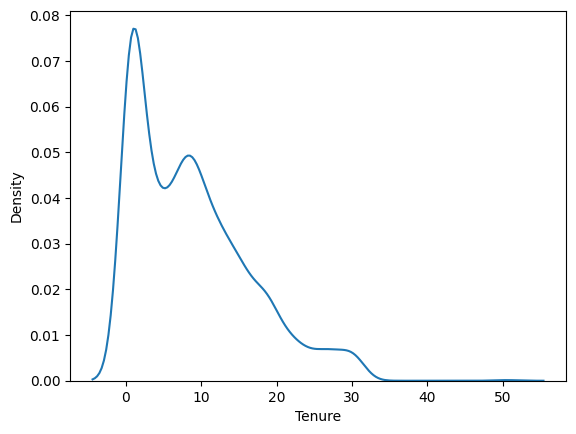

In [ ]:
sns.kdeplot(df , x='Tenure')


In [ ]:
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')


<Axes: xlabel='Tenure', ylabel='Density'>

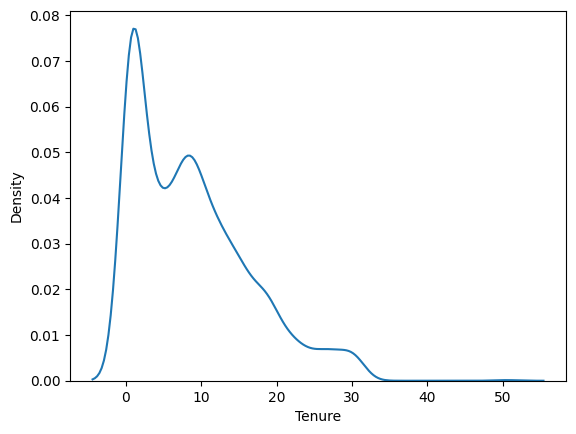

In [ ]:
sns.kdeplot(df , x='Tenure')


In [ ]:
df['Tenure'].isnull().sum()


0

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

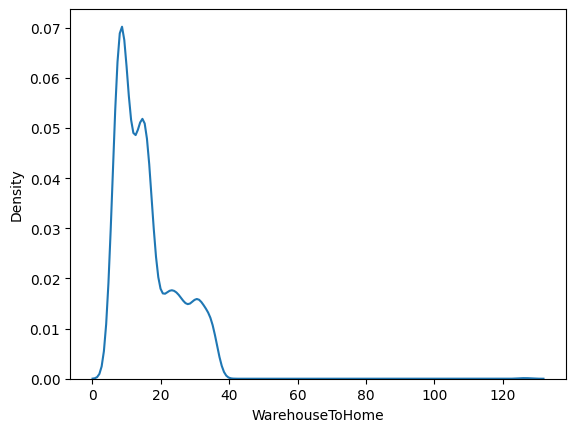

In [ ]:
sns.kdeplot(df , x='WarehouseToHome')


In [ ]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

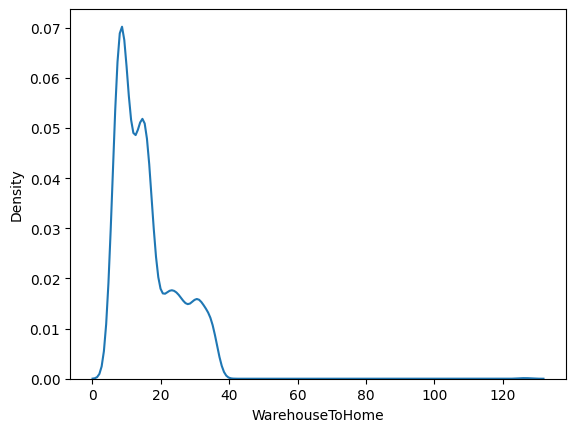

In [ ]:
sns.kdeplot(df , x='WarehouseToHome')


In [ ]:
df['WarehouseToHome'].isnull().sum()


0

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

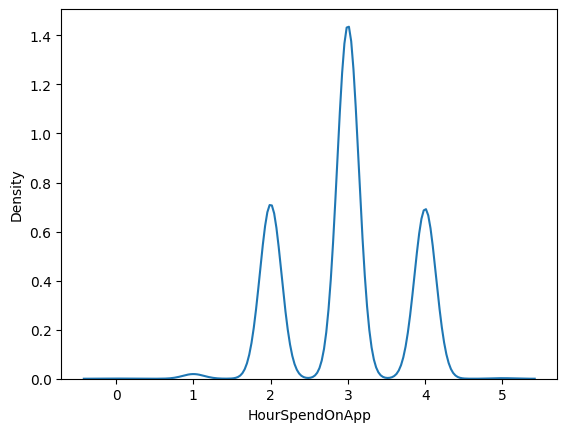

In [ ]:
sns.kdeplot(df , x='HourSpendOnApp')


In [ ]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

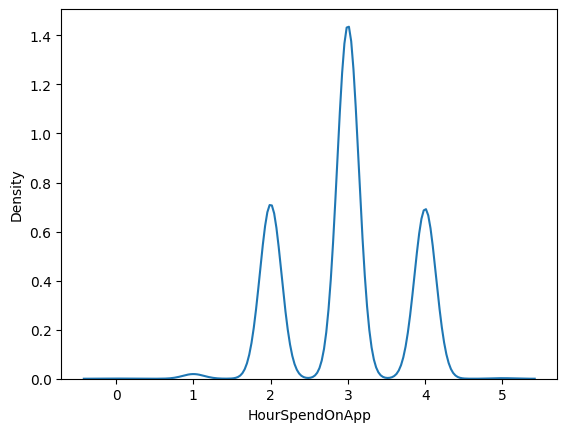

In [ ]:
sns.kdeplot(df , x='HourSpendOnApp')


In [ ]:
df['HourSpendOnApp'].isnull().sum()


0

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

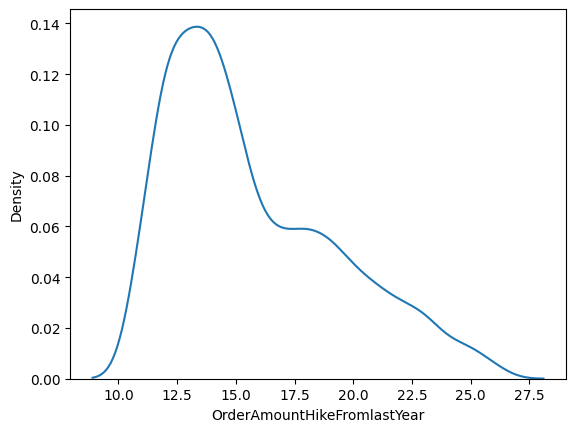

In [ ]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')


In [ ]:
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')


<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

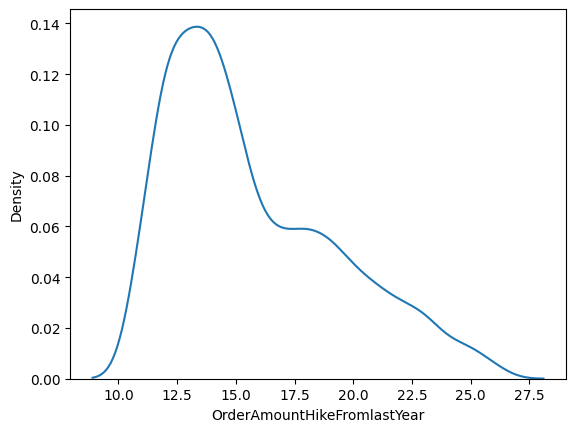

In [ ]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')


In [ ]:
df['OrderAmountHikeFromlastYear'].isnull().sum()


0

<Axes: xlabel='CouponUsed', ylabel='Density'>

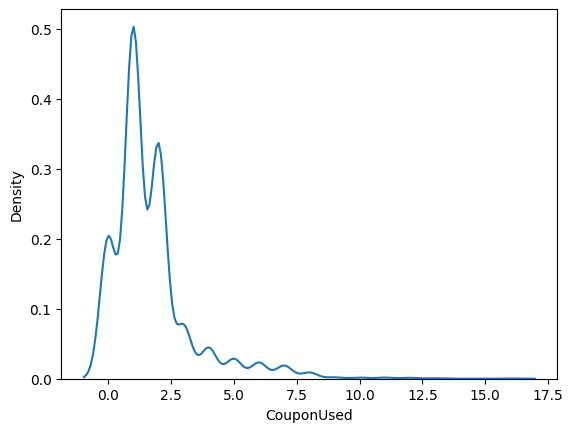

In [ ]:
sns.kdeplot(df , x='CouponUsed')


In [ ]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])


<Axes: xlabel='CouponUsed', ylabel='Density'>

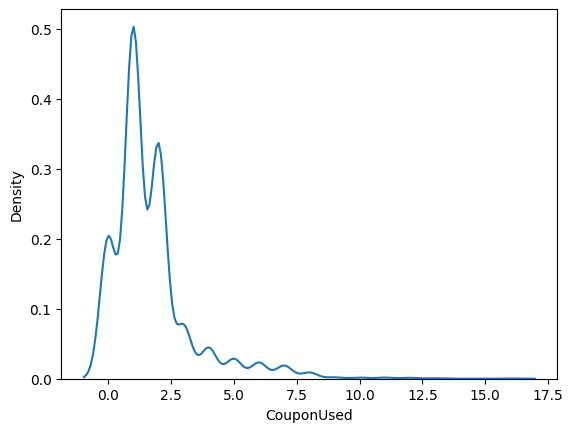

In [ ]:
sns.kdeplot(df , x='CouponUsed')


In [ ]:
df['CouponUsed'].isnull().sum()


0

<Axes: xlabel='OrderCount', ylabel='Density'>

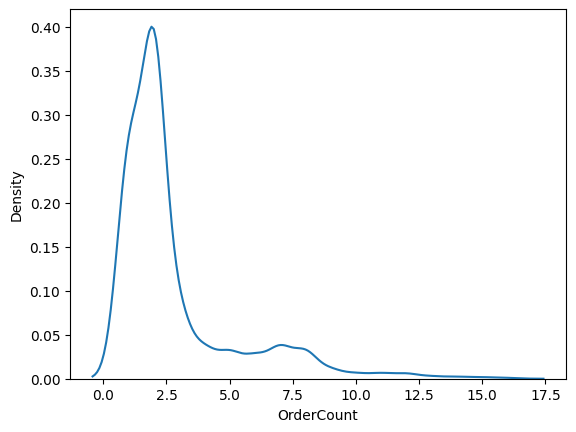

In [ ]:
sns.kdeplot(df , x='OrderCount')


<Axes: xlabel='OrderCount', ylabel='Density'>

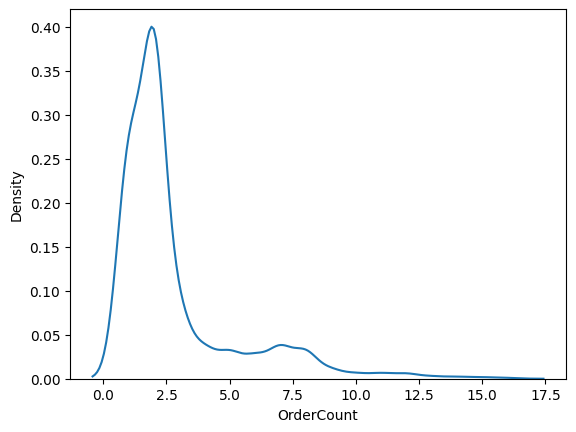

In [ ]:
sns.kdeplot(df , x='OrderCount')


In [ ]:
df['DaySinceLastOrder'].isnull().sum()


0

In [ ]:
df.drop('CustomerID' , axis = 1 , inplace = True)


In [ ]:
df.shape


(3774, 19)

We Handled Mssing Values

**ENCODING**

In [ ]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)

PreferredLoginDevice
Mobile Phone    2663
Computer        1111
Name: count, dtype: int64
****************************************
PreferredPaymentMode
Debit Card          1538
Credit Card         1159
E wallet             443
Cash on Delivery     349
UPI                  285
Name: count, dtype: int64
****************************************
Gender
Male      2271
Female    1503
Name: count, dtype: int64
****************************************
PreferedOrderCat
Laptop & Accessory    1961
Mobile Phone          1346
Fashion                443
Others                  18
Grocery                  6
Name: count, dtype: int64
****************************************
MaritalStatus
Married     1982
Single      1245
Divorced     547
Name: count, dtype: int64
****************************************


In [ ]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
5,Computer,Debit Card,Female,Mobile Phone,Single
11,Mobile Phone,Debit Card,Male,Fashion,Single
12,Mobile Phone,Cash on Delivery,Male,Mobile Phone,Single
...,...,...,...,...,...
5624,Mobile Phone,UPI,Female,Mobile Phone,Single
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [ ]:
le = LabelEncoder()


In [ ]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
5,1,0.0,0,1,22.0,2,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139
11,1,11.0,1,1,6.0,2,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,154


In [ ]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,2,0,2,2
3,1,2,1,2,2
5,0,2,0,3,2
11,1,2,1,0,2


**Handling Outliers**

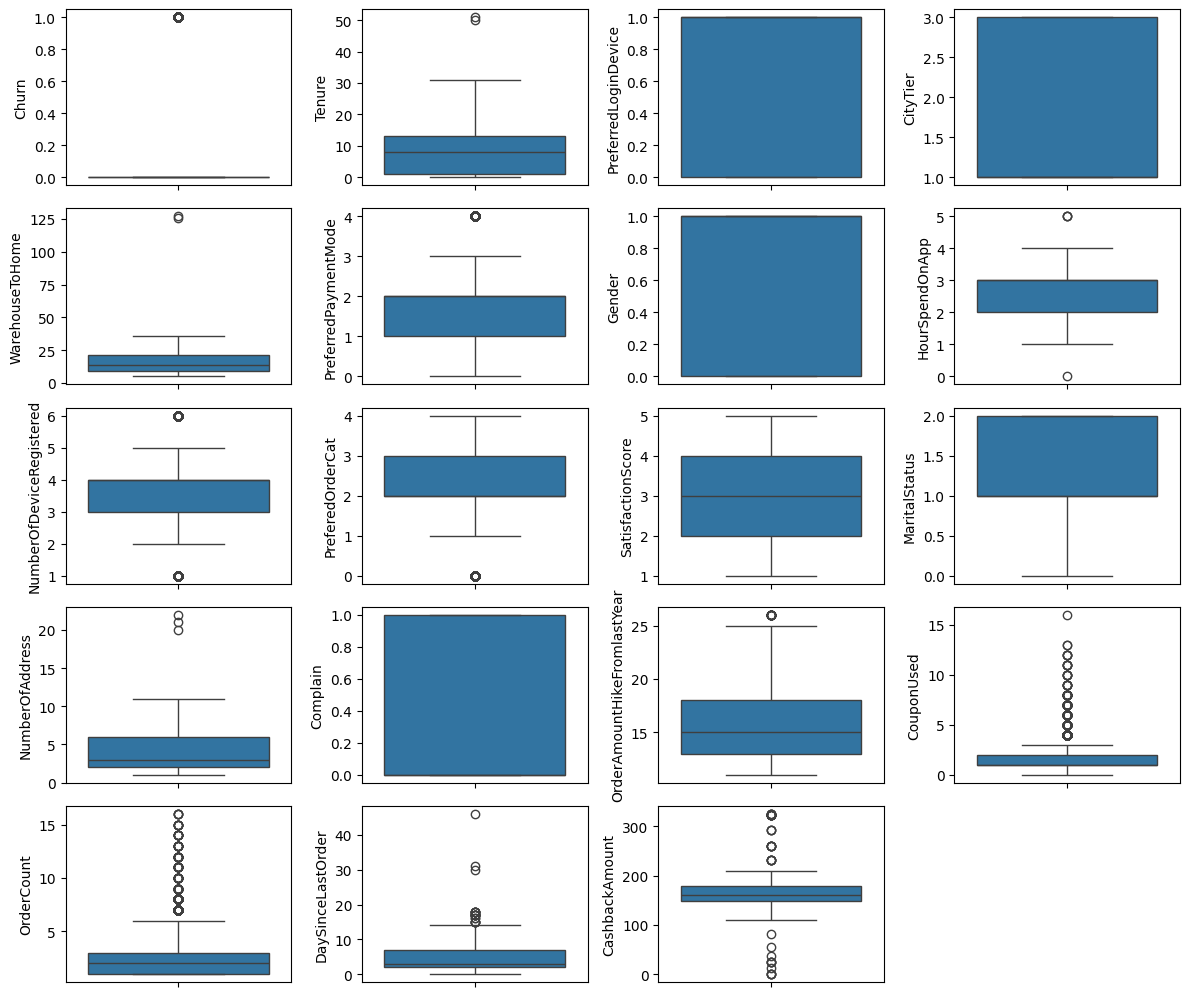

In [ ]:
df.dtypes
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [ ]:
df.columns


Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
5,1,0.0,0,1,22.0,2,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139
11,1,11.0,1,1,6.0,2,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,154


In [ ]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
5,1,0.0,0,1,22.0,2,0,3.0,5,3,5,2,2,1,22.0,4.0,6.0,7.0,139
11,1,11.0,1,1,6.0,2,1,3.0,4,0,3,2,10,1,13.0,0.0,1.0,0.0,154


we made Trim on cols that contains outliers but after we check we saw many inforamtion deleted so we made Trimming only on cols that not conatins many outliers

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.338992,-0.031157,0.060815,0.088688,-0.010360,0.045124,0.042442,0.112965,0.083238,0.103474,0.127831,0.068785,0.242095,0.024440,0.005053,-0.008358,-0.151607,-0.070787
Tenure,-0.338992,1.000000,-0.001585,-0.063626,-0.030674,-0.003059,-0.063385,-0.020824,-0.062246,-0.198882,-0.015544,-0.083454,0.215973,-0.039862,-0.010665,0.079016,0.123234,0.135645,0.221965
PreferredLoginDevice,-0.031157,-0.001585,1.000000,0.007707,-0.016976,-0.006990,-0.027542,0.010092,-0.006600,-0.023316,0.044890,-0.016156,0.031814,0.016654,0.014264,0.005376,-0.009792,-0.042631,0.025229
CityTier,0.060815,-0.063626,0.007707,1.000000,-0.004482,0.244686,-0.015627,-0.068469,-0.028530,-0.225195,-0.016048,-0.010921,-0.057880,0.000624,-0.029067,0.003990,0.024118,0.011958,0.157563
WarehouseToHome,0.088688,-0.030674,-0.016976,-0.004482,1.000000,-0.019264,0.018015,0.050810,0.002299,-0.028713,0.007023,-0.029092,0.001647,0.010832,0.036336,-0.028836,0.003542,0.027776,0.003318
PreferredPaymentMode,-0.010360,-0.003059,-0.006990,0.244686,-0.019264,1.000000,0.017223,-0.042117,-0.002848,-0.088462,-0.012827,-0.018685,0.000440,0.019058,0.025605,-0.030373,-0.047088,-0.016068,0.054340
Gender,0.045124,-0.063385,-0.027542,-0.015627,0.018015,0.017223,1.000000,-0.000202,-0.020442,0.041190,-0.030240,-0.015111,-0.029621,-0.033504,0.004993,-0.029368,-0.025665,-0.020150,-0.011810
HourSpendOnApp,0.042442,-0.020824,0.010092,-0.068469,0.050810,-0.042117,-0.000202,1.000000,0.255103,0.226807,0.043731,-0.039999,0.118321,0.010042,0.091304,0.168671,0.095536,0.041404,0.133785
NumberOfDeviceRegistered,0.112965,-0.062246,-0.006600,-0.028530,0.002299,-0.002848,-0.020442,0.255103,1.000000,0.141074,0.010896,0.051489,0.040547,0.009846,0.066810,0.096457,0.051817,-0.034044,0.074880
PreferedOrderCat,0.083238,-0.198882,-0.023316,-0.225195,-0.028713,-0.088462,0.041190,0.226807,0.141074,1.000000,-0.015393,0.042298,0.009360,0.012093,0.065153,-0.056290,-0.157098,-0.246856,-0.558299


<Axes: >

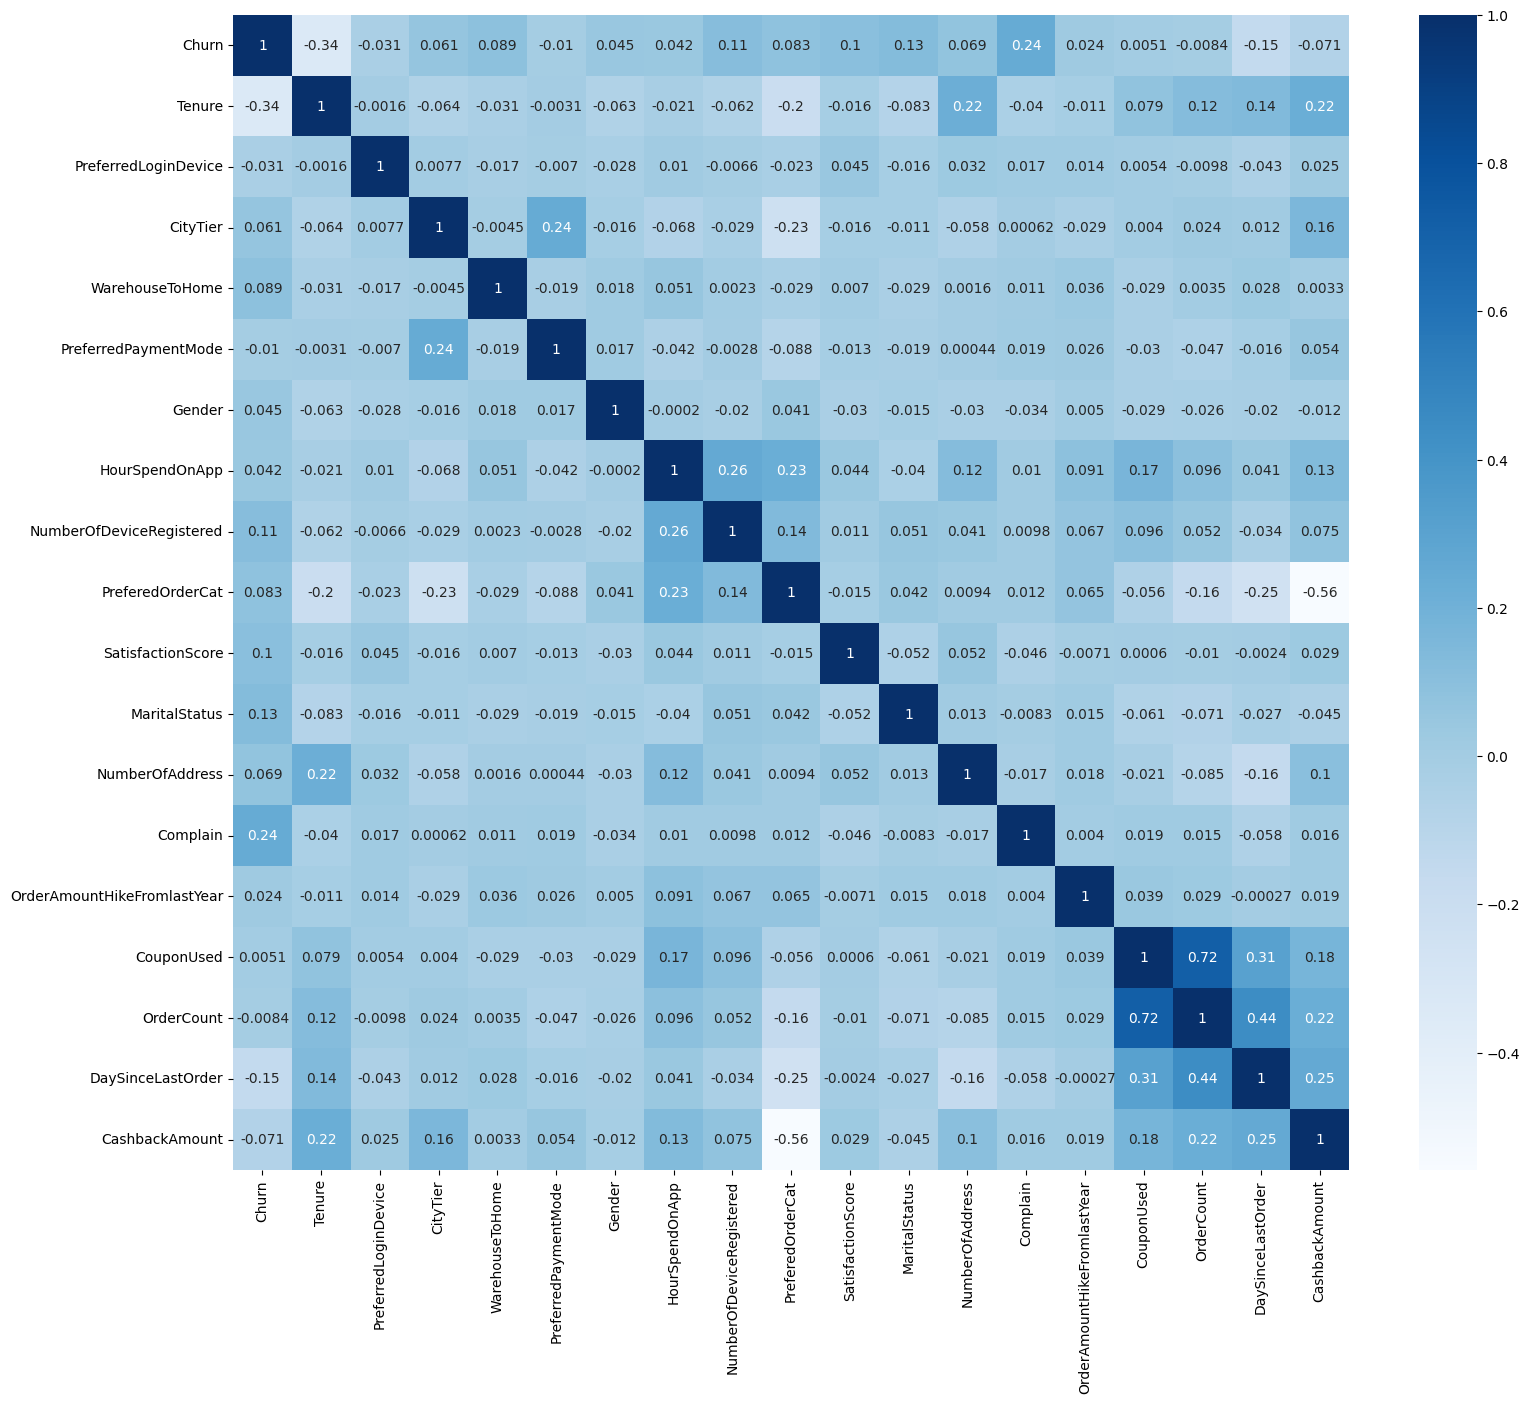

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [ ]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

Churn                          1.000000
Complain                       0.242095
MaritalStatus                  0.127831
NumberOfDeviceRegistered       0.112965
SatisfactionScore              0.103474
WarehouseToHome                0.088688
PreferedOrderCat               0.083238
NumberOfAddress                0.068785
CityTier                       0.060815
Gender                         0.045124
HourSpendOnApp                 0.042442
OrderAmountHikeFromlastYear    0.024440
CouponUsed                     0.005053
OrderCount                    -0.008358
PreferredPaymentMode          -0.010360
PreferredLoginDevice          -0.031157
CashbackAmount                -0.070787
DaySinceLastOrder             -0.151607
Tenure                        -0.338992
Name: Churn, dtype: float64

Text(0.5, 1.0, 'Relation Between Features and target')

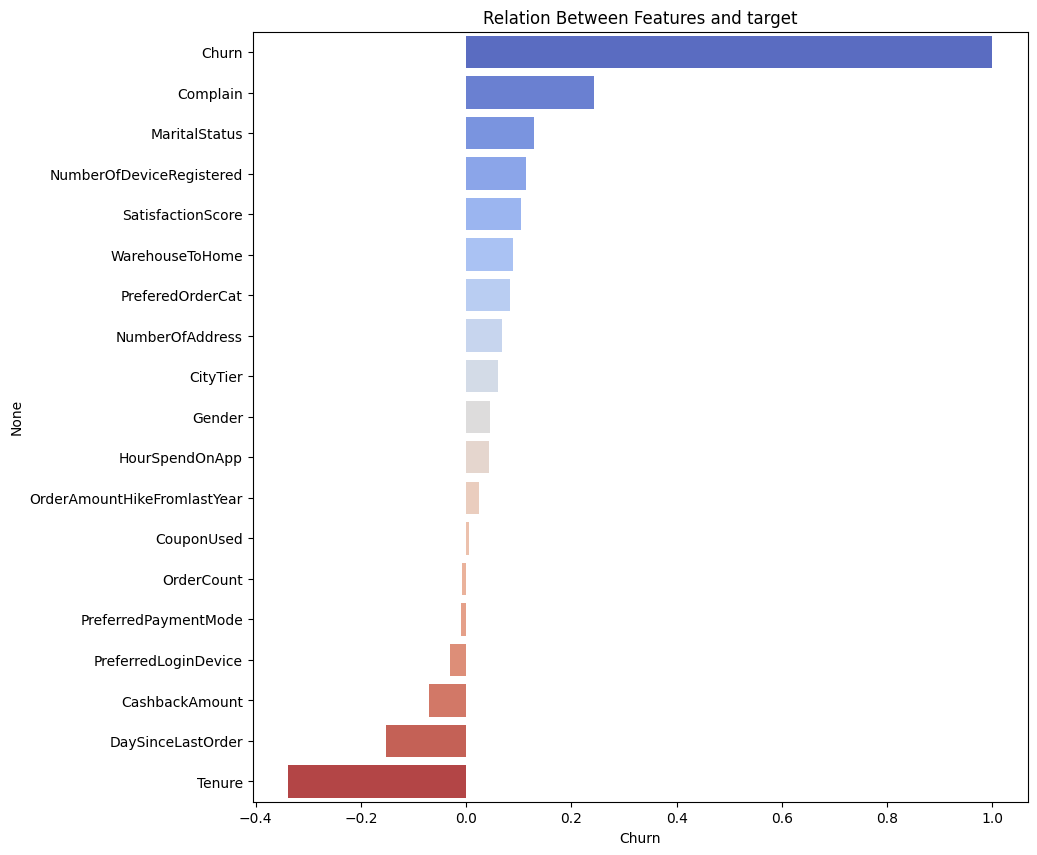

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

In [ ]:
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

Our Data Imbalanced so lets make Over sample for it Using SMOTETomek


**Handling Imbalanced Data**

In [ ]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution
print(Counter(Y))

# Assuming the minority class has only 3 samples
smt = SMOTETomek(smote=SMOTE(k_neighbors=2), random_state=42)
x_over, y_over = smt.fit_resample(X, Y)

# Check new class distribution after resampling
print(Counter(y_over))


Counter({0: 2857, 1: 569})
Counter({1: 2857, 0: 2857})


In [ ]:
from imblearn.combine import SMOTETomek


In [ ]:
x_over.shape, y_over.shape


((5714, 18), (5714,))

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size = 0.30 , random_state = 42)

In [ ]:
# Now we  will make normalization for all data to make them in commom range
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler

MN = MinMaxScaler()
# SC = StandardScaler()
# Rb = RobustScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

**Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

In [ ]:
logisreg_clf = LogisticRegression()
svm_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
XGB_clf = XGBClassifier()
ada_clf = AdaBoostClassifier()

In [ ]:
clf_list = [logisreg_clf, svm_clf, dt_clf, rf_clf, XGB_clf, ada_clf]
clf_name_list = ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'XGBClassifier' , 'AdaBoostClassifier']

for clf in clf_list:
    clf.fit(x_train_scaled,y_train)

In [ ]:
train_acc_list = []
test_acc_list = []

for clf,name in zip(clf_list,clf_name_list):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred_test = clf.predict(x_test_scaled)
    print(f'Using model: {name}')
    print(f'Trainning Score: {clf.score(x_train_scaled, y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled, y_test)}')
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))
    print(' ' * 60)
    print('*' * 60)
    print(' ' * 60)

Using model: Logistic Regression
Trainning Score: 0.7881970492623156
Test Score: 0.7784256559766763
Acc Train: 0.7881970492623156
Acc Test: 0.7784256559766763
                                                            
************************************************************
                                                            
Using model: Support Vector Machine
Trainning Score: 0.9174793698424606
Test Score: 0.8734693877551021
Acc Train: 0.9174793698424606
Acc Test: 0.8734693877551021
                                                            
************************************************************
                                                            
Using model: Decision Tree
Trainning Score: 1.0
Test Score: 0.8233236151603499
Acc Train: 1.0
Acc Test: 0.8233236151603499
                                                            
************************************************************
                                                            
Using m

In [ ]:
# graph to determine best 2 models

all_models = pd.DataFrame({'Train_Accuarcy': train_acc_list , 'Test_Accuarcy' : test_acc_list}  , index = clf_name_list)
all_models

,Train_Accuarcy,Test_Accuarcy
Logistic Regression,0.788197,0.778426
Support Vector Machine,0.917479,0.873469
Decision Tree,1.000000,0.823324
Random Forest,1.000000,0.967930
XGBClassifier,1.000000,0.944606
AdaBoostClassifier,0.877219,0.784257


In [ ]:
# Models vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuarcy'], y = all_models.index ,color=all_models['Train_Accuarcy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Sccracy',
yaxis_title='Models Names',
)
fig.show()


# Models vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuarcy'], y = all_models.index ,color=all_models['Test_Accuarcy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Test Accuarcy',
yaxis_title='Models Names',
)
fig.show()

from Graphs Best 2 Models in Train and Test are [ Random Forest , XGBoost]

In [ ]:
!pip install mlxtend


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, RocCurveDisplay

**Evaluation**

Accuracy = 0.7784256559766763
ROC Area under Curve = 0.7794497721553425
              precision    recall  f1-score   support

           0    0.82930   0.70920   0.76456       870
           1    0.73944   0.84970   0.79075       845

    accuracy                        0.77843      1715
   macro avg    0.78437   0.77945   0.77765      1715
weighted avg    0.78503   0.77843   0.77746      1715

**********************************************************************


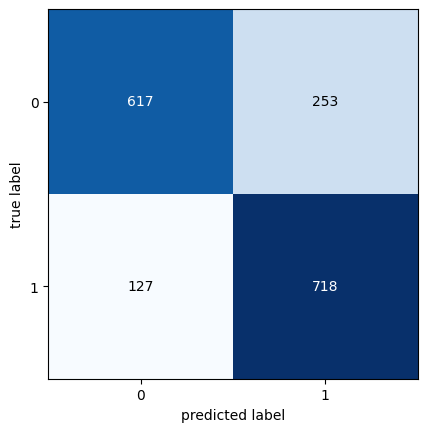

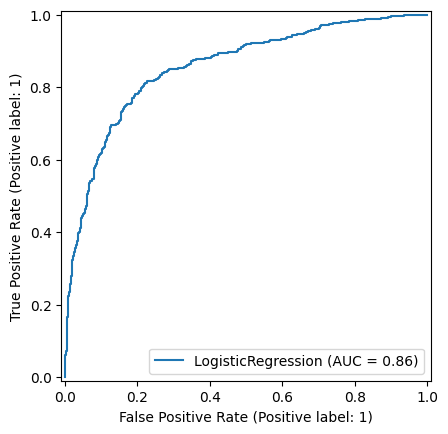

In [ ]:
# Logistic regression
model= LogisticRegression()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc1))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
print('*' * 70)
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8734693877551021
ROC Area under Curve = 0.8744881996871386
              precision    recall  f1-score   support

           0    0.93708   0.80460   0.86580       870
           1    0.82438   0.94438   0.88031       845

    accuracy                        0.87347      1715
   macro avg    0.88073   0.87449   0.87305      1715
weighted avg    0.88155   0.87347   0.87295      1715



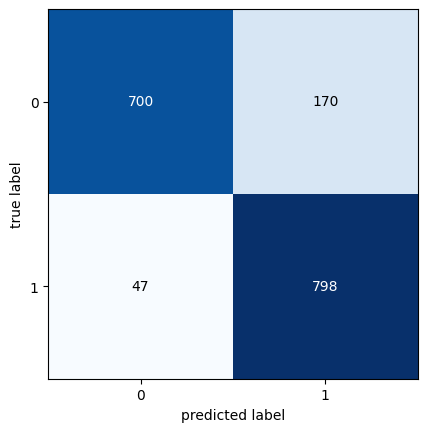

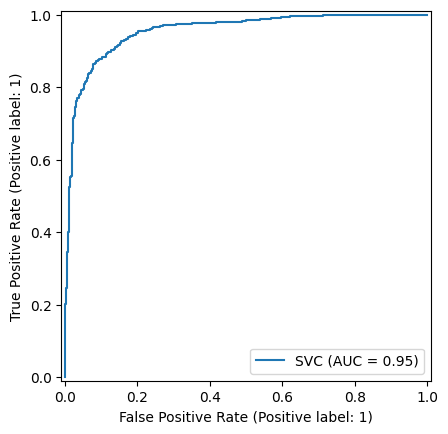

In [ ]:
# Support Vector Machine
model=SVC()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc2 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc2))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.8145772594752186
ROC Area under Curve = 0.8132796028021492
              precision    recall  f1-score   support

           0    0.77112   0.90230   0.83157       870
           1    0.87805   0.72426   0.79377       845

    accuracy                        0.81458      1715
   macro avg    0.82458   0.81328   0.81267      1715
weighted avg    0.82380   0.81458   0.81295      1715



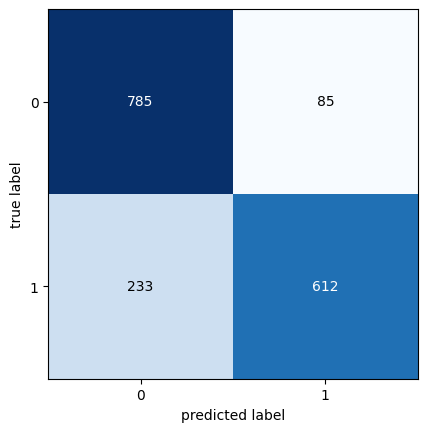

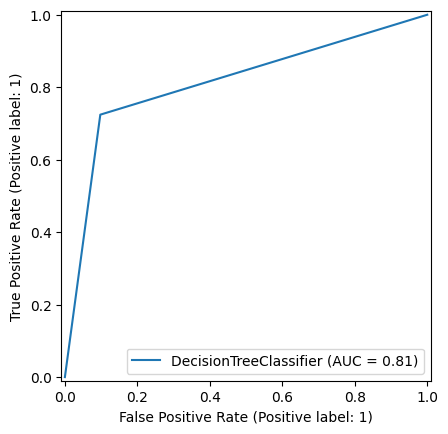

In [ ]:
# Decision Tree
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc3 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc3))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.970262390670554
ROC Area under Curve = 0.9702135618581242
              precision    recall  f1-score   support

           0    0.96800   0.97356   0.97077       870
           1    0.97262   0.96686   0.96973       845

    accuracy                        0.97026      1715
   macro avg    0.97031   0.97021   0.97025      1715
weighted avg    0.97028   0.97026   0.97026      1715



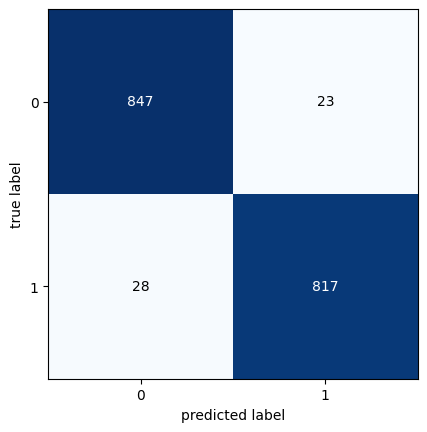

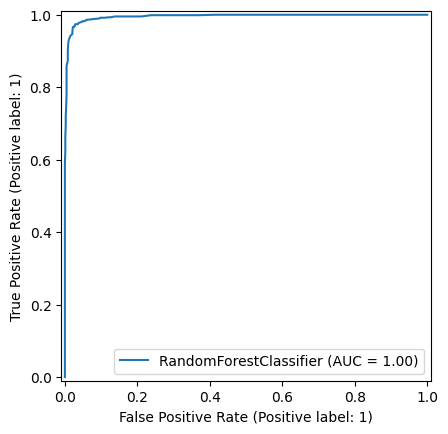

In [ ]:
# random forest
model=RandomForestClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc4 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc4))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.9446064139941691
ROC Area under Curve = 0.9448071822077126
              precision    recall  f1-score   support

           0    0.95858   0.93103   0.94461       870
           1    0.93103   0.95858   0.94461       845

    accuracy                        0.94461      1715
   macro avg    0.94481   0.94481   0.94461      1715
weighted avg    0.94501   0.94461   0.94461      1715



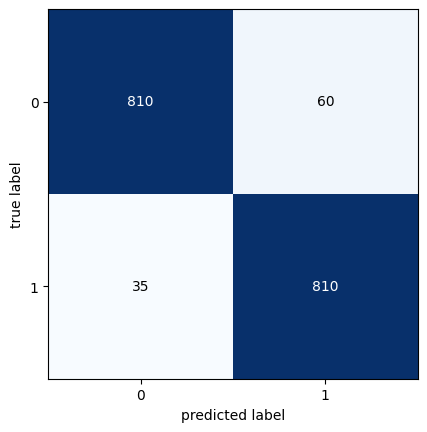

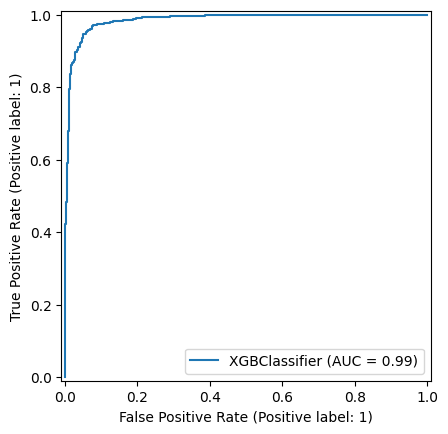

In [ ]:
# XGBoost
model=XGBClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc5 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc5))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

Accuracy = 0.7842565597667639
ROC Area under Curve = 0.7863021152145822
              precision    recall  f1-score   support

           0    0.90064   0.64598   0.75234       870
           1    0.71769   0.92663   0.80888       845

    accuracy                        0.78426      1715
   macro avg    0.80917   0.78630   0.78061      1715
weighted avg    0.81050   0.78426   0.78020      1715



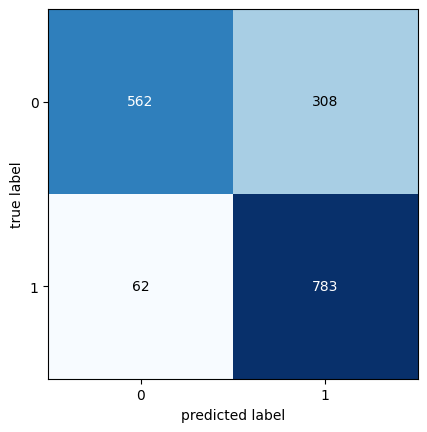

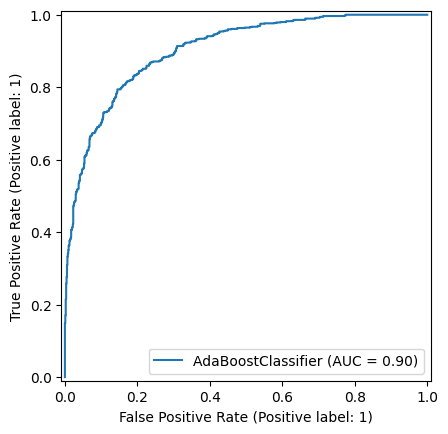

In [ ]:
# adaboost
model=AdaBoostClassifier()
model.fit(x_train_scaled,y_train)
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc6 = roc_auc_score(y_test, y_pred)
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc6))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))
RocCurveDisplay.from_estimator(model , x_test_scaled , y_test)

**Auto ML**


In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *


In [ ]:
model_setup = setup(df , target = 'Churn' , train_size=0.7)


,Description,Value
0,Session id,6527
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3426, 19)"
4,Transformed data shape,"(3426, 19)"
5,Transformed train set shape,"(2398, 19)"
6,Transformed test set shape,"(1028, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9621,0.9741,0.8492,0.9185,0.8814,0.8589,0.8606,1.0350
et,Extra Trees Classifier,0.9600,0.9855,0.7815,0.9734,0.8661,0.8429,0.8505,0.5810
xgboost,Extreme Gradient Boosting,0.9575,0.9696,0.8492,0.8934,0.8694,0.8441,0.8454,0.2160
rf,Random Forest Classifier,0.9550,0.9797,0.7915,0.9274,0.8535,0.8271,0.8311,0.7770
dt,Decision Tree Classifier,0.9258,0.8841,0.8216,0.7553,0.7858,0.7411,0.7429,0.0700
gbc,Gradient Boosting Classifier,0.9128,0.9389,0.6154,0.8188,0.6993,0.6498,0.6608,0.9950
ada,Ada Boost Classifier,0.8949,0.9069,0.5504,0.7556,0.6318,0.5728,0.5854,0.3430
lr,Logistic Regression,0.8766,0.8569,0.4043,0.7392,0.5173,0.4542,0.4839,1.0660
lda,Linear Discriminant Analysis,0.8741,0.8475,0.3742,0.7481,0.4946,0.4320,0.4679,0.0890
knn,K Neighbors Classifier,0.8670,0.8468,0.4173,0.6667,0.5104,0.4382,0.4559,0.1040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# evaluate trained model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
print(df.columns)

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact, widgets

# Load the dataset
df = pd.read_csv('Ecom.csv')

# Preprocessing
# Handling missing values
df.fillna(0, inplace=True)

# Encoding categorical variables
encoder = LabelEncoder()
df['PreferredLoginDevice'] = encoder.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode'] = encoder.fit_transform(df['PreferredPaymentMode'])
df['Gender'] = encoder.fit_transform(df['Gender'])
df['PreferedOrderCat'] = encoder.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])

# Split the data into features and target variable
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

def predict_churn(Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender,
                  HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore,
                  MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed,
                  OrderCount, DaySinceLastOrder, CashbackAmount):
    # Make prediction
    prediction = model.predict([[Tenure, PreferredLoginDevice, CityTier, WarehouseToHome,
                                  PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered,
                                  PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress,
                                  Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount,
                                  DaySinceLastOrder, CashbackAmount]])
    churn_status = "Churn" if prediction[0] == 1 else "Not Churn"
    print(f"The customer is likely to {churn_status}")

# Create interactive widgets for input features
interact(predict_churn,
         Tenure=widgets.IntSlider(min=0, max=df['Tenure'].max(), step=1, value=df['Tenure'].min()),
         PreferredLoginDevice=widgets.Select(options=df['PreferredLoginDevice'].unique().tolist(), value=df['PreferredLoginDevice'].iloc[0]),
         CityTier=widgets.IntSlider(min=0, max=df['CityTier'].max(), step=1, value=df['CityTier'].min()),
         WarehouseToHome=widgets.IntSlider(min=0, max=df['WarehouseToHome'].max(), step=1, value=df['WarehouseToHome'].min()),
         PreferredPaymentMode=widgets.Select(options=df['PreferredPaymentMode'].unique().tolist(), value=df['PreferredPaymentMode'].iloc[0]),
         Gender=widgets.Select(options=df['Gender'].unique().tolist(), value=df['Gender'].iloc[0]),
         HourSpendOnApp=widgets.IntSlider(min=0, max=df['HourSpendOnApp'].max(), step=1, value=df['HourSpendOnApp'].min()),
         NumberOfDeviceRegistered=widgets.IntSlider(min=0, max=df['NumberOfDeviceRegistered'].max(), step=1, value=df['NumberOfDeviceRegistered'].min()),
         PreferedOrderCat=widgets.Select(options=df['PreferedOrderCat'].unique().tolist(), value=df['PreferedOrderCat'].iloc[0]),
         SatisfactionScore=widgets.IntSlider(min=0, max=df['SatisfactionScore'].max(), step=1, value=df['SatisfactionScore'].min()),
         MaritalStatus=widgets.Select(options=df['MaritalStatus'].unique().tolist(), value=df['MaritalStatus'].iloc[0]),
         NumberOfAddress=widgets.IntSlider(min=0, max=df['NumberOfAddress'].max(), step=1, value=df['NumberOfAddress'].min()),
         Complain=widgets.IntSlider(min=0, max=df['Complain'].max(), step=1, value=df['Complain'].min()),
         OrderAmountHikeFromlastYear=widgets.IntSlider(min=0, max=df['OrderAmountHikeFromlastYear'].max(), step=1, value=df['OrderAmountHikeFromlastYear'].min()),
         CouponUsed=widgets.IntSlider(min=0, max=df['CouponUsed'].max(), step=1, value=df['CouponUsed'].min()),
         OrderCount=widgets.IntSlider(min=0, max=df['OrderCount'].max(), step=1, value=df['OrderCount'].min()),
         DaySinceLastOrder=widgets.IntSlider(min=0, max=df['DaySinceLastOrder'].max(), step=1, value=df['DaySinceLastOrder'].min()),
         CashbackAmount=widgets.IntSlider(min=0, max=df['CashbackAmount'].max(), step=1, value=df['CashbackAmount'].min()))


interactive(children=(IntSlider(value=0, description='Tenure', max=61), Select(description='PreferredLoginDevi…

<function __main__.predict_churn(Tenure, PreferredLoginDevice, CityTier, WarehouseToHome, PreferredPaymentMode, Gender, HourSpendOnApp, NumberOfDeviceRegistered, PreferedOrderCat, SatisfactionScore, MaritalStatus, NumberOfAddress, Complain, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount)>